In [ ]:
from google.colab import drive

# see https://colab.research.google.com/notebooks/io.ipynb#scrollTo=RWSJpsyKqHjH
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


## Get Data

In [ ]:
dataDir = '/content/drive/MyDrive/Deep Learning/data/archive'

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt       # plotting
import numpy as np                    # linear algebra
import os                             # accessing directory structure
import pandas as pd                   # data processing, CSV file I/O (e.g. pd.read_csv)
from itertools import cycle, islice

In [ ]:
# Get the data for the K-MNIST dataset
kmnist_classmap = os.path.join(dataDir, 'kmnist_classmap.csv')
df = pd.read_csv(kmnist_classmap, delimiter=',')
df.dataframeName = 'kmnist_classmap.csv'
nRow, nCol = df.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 10 rows and 3 columns


In [ ]:
ytrain=pd.read_csv(kmnist_classmap, delimiter=',')
print(ytrain.char)

0    お
1    き
2    す
3    つ
4    な
5    は
6    ま
7    や
8    れ
9    を
Name: char, dtype: object


In [ ]:
df.head(5)

,index,codepoint,char
0,0,U+304A,お
1,1,U+304D,き
2,2,U+3059,す
3,3,U+3064,つ
4,4,U+306A,な


## Prepare Datasets

In [ ]:
# Some variables
SEED = 444

image_dim = 28
input_shape = (image_dim, image_dim, 1)

batch_size = 128
epochs = 15

In [ ]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, Dropout, MaxPooling2D, BatchNormalization
from tensorflow.keras.utils import to_categorical

# Paths
train_images_path = os.path.join(dataDir, 'kmnist-train-imgs.npz')
train_labels_path = os.path.join(dataDir, 'kmnist-train-labels.npz')
test_images_path = os.path.join(dataDir, 'kmnist-test-imgs.npz')
test_labes_path = os.path.join(dataDir, 'kmnist-test-labels.npz')

# Data loading
train_images = np.load(train_images_path)['arr_0']
train_labels = np.load(train_labels_path)['arr_0']
test_images = np.load(test_images_path)['arr_0']
test_labels = np.load(test_labes_path)['arr_0']

num_classes = len(np.unique(train_labels))

print("Classes:", num_classes)
print(f"Number of training samples: {len(train_images)} where each sample is of size: {train_images.shape[1:]}")
print(f"Number of test samples: {len(test_images)} where each sample is of size: {test_images.shape[1:]}")

Classes: 10
Number of training samples: 60000 where each sample is of size: (28, 28)
Number of test samples: 10000 where each sample is of size: (28, 28)


## Plot Data

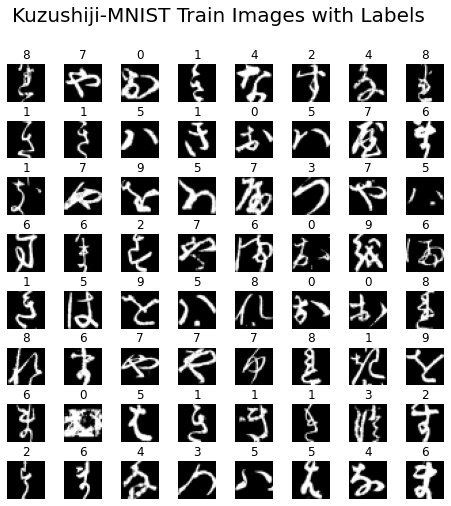

In [ ]:
n = 8
fig, axs = plt.subplots(nrows=n, ncols=n, figsize=(8, 8))
fig.suptitle('Kuzushiji-MNIST Train Images with Labels', fontsize=20)

for i in range(n**2):
    ax = axs[i // n, i % n]
    ax.imshow(train_images[i], cmap='gray')
    ax.set_title(train_labels[i])
    ax.axis('off')

plt.subplots_adjust(hspace=0.5)
plt.savefig('/content/drive/MyDrive/Deep Learning/training_images_mnist.png')
plt.savefig('/content/drive/MyDrive/Deep Learning/training_images_mnist.jpg')
plt.savefig('/content/drive/MyDrive/Deep Learning/training_images_mnist.svg')
plt.savefig('/content/drive/MyDrive/Deep Learning/training_images_mnist.pdf')
plt.show()

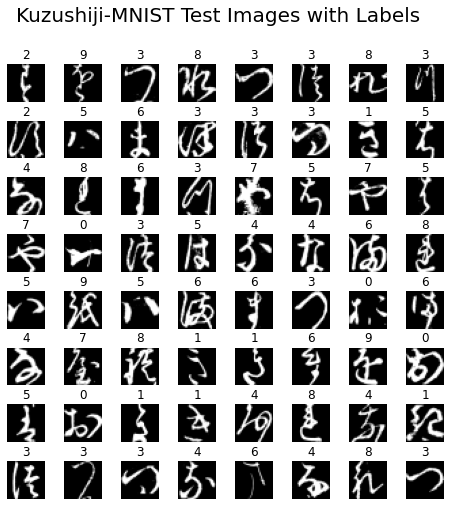

In [ ]:
n = 8
fig, axs = plt.subplots(nrows=n, ncols=n, figsize=(8, 8))
fig.suptitle('Kuzushiji-MNIST Test Images with Labels', fontsize=20)

for i in range(n**2):
    ax = axs[i // n, i % n]
    ax.imshow(test_images[i], cmap='gray')
    ax.set_title(test_labels[i])
    ax.axis('off')

plt.subplots_adjust(hspace=0.5)
plt.savefig('/content/drive/MyDrive/Deep Learning/test_images_mnist.png')
plt.savefig('/content/drive/MyDrive/Deep Learning/test_images_mnist.jpg')
plt.savefig('/content/drive/MyDrive/Deep Learning/test_images_mnist.svg')
plt.savefig('/content/drive/MyDrive/Deep Learning/test_images_mnist.pdf')
plt.show()

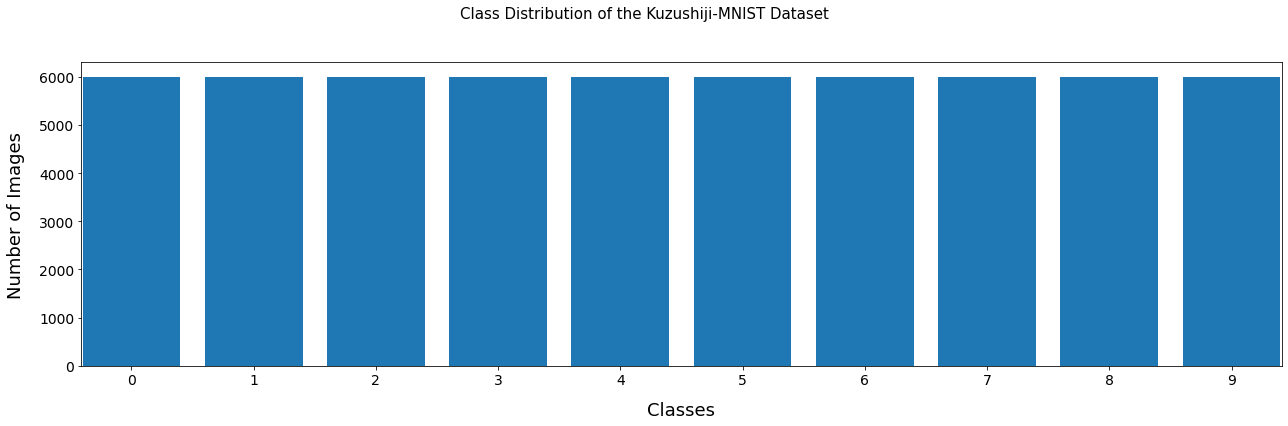

In [ ]:
# Plot the data repartition between all classes
kmninst_train_labels = pd.Series(train_labels)
kmninst_train_labels_values = kmninst_train_labels.value_counts(sort=False).sort_index()
fig, ax = plt.subplots(figsize=(18,6))
fig.suptitle('Class Distribution of the Kuzushiji-MNIST Dataset', fontsize=15)
ax.bar(kmninst_train_labels_values.index, kmninst_train_labels_values.values)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.margins(x=0.001)
plt.subplots_adjust(bottom=0.2)
ax.set_xticks(kmninst_train_labels_values.index)
ax.set_xlabel('Classes', fontsize=18, labelpad=14)
ax.set_ylabel('Number of Images', fontsize=18, labelpad=14)
fig.tight_layout()
plt.subplots_adjust(top=0.85)
plt.savefig('/content/drive/MyDrive/Deep Learning/class_distribution_mnist.png', bbox_inches='tight')
plt.savefig('/content/drive/MyDrive/Deep Learning/class_distribution_mnist.jpg', bbox_inches='tight')
plt.savefig('/content/drive/MyDrive/Deep Learning/class_distribution_mnist.svg', bbox_inches='tight')
plt.savefig('/content/drive/MyDrive/Deep Learning/class_distribution_mnist.pdf', bbox_inches='tight')
plt.show()

#kmninst_train_labels_values.plot.bar(figsize=(15,4))

In [ ]:
from sklearn.model_selection import train_test_split

# Convert label vectors to matrices
train_labels = to_categorical(train_labels, num_classes)
test_labels = to_categorical(test_labels, num_classes)

# Split the train dataset in train and validation datasets
train_set, validation_set, train_labels, validation_labels = train_test_split(train_images, train_labels, test_size = 0.1, random_state = SEED)

# Normalize the datasets
train_set = train_set.reshape(train_set.shape[0], train_set.shape[1], train_set.shape[2], 1)/255
validation_set = validation_set.reshape(validation_set.shape[0], validation_set.shape[1], validation_set.shape[2], 1)/255
test_set = test_images.reshape(test_images.shape[0], test_images.shape[1], test_images.shape[2], 1)/255

# Dimensions of the datasets
print(f"""
Train set dimensions: {train_set.shape}
Validation set dimensions: {validation_set.shape}
Test set dimensions: {test_set.shape}
""")


Train set dimensions: (54000, 28, 28, 1)
Validation set dimensions: (6000, 28, 28, 1)
Test set dimensions: (10000, 28, 28, 1)



## Build and Train Model 1


In [ ]:
# Define a CNN model
model = Sequential()

model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))

model.add(Dense(num_classes, activation='softmax'))

model.summary()

model.compile(loss='categorical_crossentropy',
              optimizer='adadelta',
              metrics=['accuracy'])

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 24, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 64)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 12, 12, 64)        0         
                                                                 
 flatten (Flatten)           (None, 9216)              0         
                                                                 
 dense (Dense)               (None, 128)               1179776   
                                                        

In [ ]:
training_recap = model.fit(train_set, train_labels,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1,
                    validation_data=(validation_set, validation_labels))

Epoch 1/15
422/422 [==============================] - 15s 10ms/step - loss: 2.2892 - accuracy: 0.1188 - val_loss: 2.2699 - val_accuracy: 0.1558
Epoch 2/15
422/422 [==============================] - 4s 9ms/step - loss: 2.2577 - accuracy: 0.1810 - val_loss: 2.2343 - val_accuracy: 0.2623
Epoch 3/15
422/422 [==============================] - 4s 9ms/step - loss: 2.2192 - accuracy: 0.2489 - val_loss: 2.1879 - val_accuracy: 0.3748
Epoch 4/15
422/422 [==============================] - 4s 9ms/step - loss: 2.1695 - accuracy: 0.3107 - val_loss: 2.1246 - val_accuracy: 0.4755
Epoch 5/15
422/422 [==============================] - 4s 9ms/step - loss: 2.1001 - accuracy: 0.3635 - val_loss: 2.0392 - val_accuracy: 0.5290
Epoch 6/15
422/422 [==============================] - 4s 9ms/step - loss: 2.0141 - accuracy: 0.4049 - val_loss: 1.9305 - val_accuracy: 0.5785
Epoch 7/15
422/422 [==============================] - 4s 9ms/step - loss: 1.9083 - accuracy: 0.4442 - val_loss: 1.8012 - val_accuracy: 0.6247
Epoc

## Plot Loss and Accuracy of Model 1

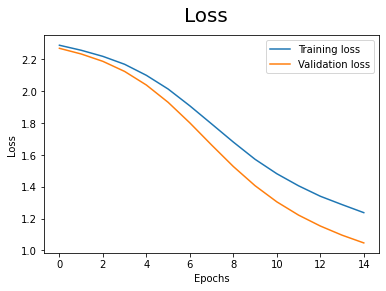

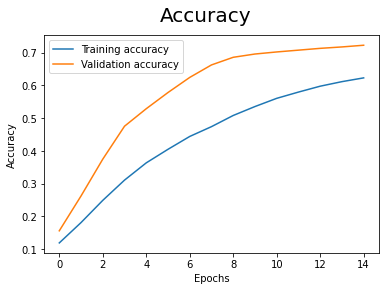

In [ ]:
plt.plot(training_recap.history['loss'], label = 'Training loss')
plt.plot(training_recap.history['val_loss'], label = 'Validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.suptitle('Loss', fontsize=20)
plt.show()

plt.plot(training_recap.history['accuracy'], label = 'Training accuracy')
plt.plot(training_recap.history['val_accuracy'], label = 'Validation accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.suptitle('Accuracy', fontsize=20)
plt.show()

## Evaluate Model 1

In [ ]:
print("Evaluate model on test data")
results = model.evaluate(test_set, test_labels, batch_size=batch_size)
print("Test loss: {:.4f}".format(results[0]))
print("Test accuracy: {:.4f}".format(results[1]))

Evaluate model on test data
79/79 [==============================] - 0s 4ms/step - loss: 1.4714 - accuracy: 0.5618
Test loss: 1.4714
Test accuracy: 0.5618


## Build and Train Model 2

In [ ]:
batch_size = 64

# Define a CNN model
model2 = Sequential()

model2.add(Conv2D(32, (5,5), activation='relu', input_shape=input_shape, padding="same"))
model2.add(MaxPooling2D(2,2))
model2.add(BatchNormalization())

model2.add(Conv2D(64, (5,5), activation='relu'))

model2.add(Conv2D(64, (5,5), activation='relu'))
model2.add(Flatten())

model2.add(Dense(64, activation='relu'))
model2.add(Dropout(0.4))

model2.add(Dense(num_classes,activation='softmax', kernel_regularizer='l2'))

model2.compile(loss = 'categorical_crossentropy',
               optimizer = 'adam',
               metrics = ['accuracy'])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 32)        832       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 14, 14, 32)       128       
 ormalization)                                                   
                                                                 
 conv2d_3 (Conv2D)           (None, 10, 10, 64)        51264     
                                                                 
 conv2d_4 (Conv2D)           (None, 6, 6, 64)          102464    
                                                                 
 flatten_1 (Flatten)         (None, 2304)             

In [ ]:
training_recap2 = model2.fit(train_set, train_labels,
                    epochs=epochs,
                    batch_size=batch_size,
                    verbose=1,
                    validation_data=(validation_set, validation_labels))

Epoch 1/15
844/844 [==============================] - 6s 5ms/step - loss: 0.4025 - accuracy: 0.9012 - val_loss: 0.1360 - val_accuracy: 0.9737
Epoch 2/15
844/844 [==============================] - 5s 5ms/step - loss: 0.1326 - accuracy: 0.9707 - val_loss: 0.1069 - val_accuracy: 0.9780
Epoch 3/15
844/844 [==============================] - 4s 5ms/step - loss: 0.0889 - accuracy: 0.9792 - val_loss: 0.0698 - val_accuracy: 0.9850
Epoch 4/15
844/844 [==============================] - 4s 5ms/step - loss: 0.0664 - accuracy: 0.9844 - val_loss: 0.0778 - val_accuracy: 0.9812
Epoch 5/15
844/844 [==============================] - 4s 5ms/step - loss: 0.0568 - accuracy: 0.9864 - val_loss: 0.0724 - val_accuracy: 0.9843
Epoch 6/15
844/844 [==============================] - 4s 5ms/step - loss: 0.0456 - accuracy: 0.9891 - val_loss: 0.0739 - val_accuracy: 0.9828
Epoch 7/15
844/844 [==============================] - 5s 6ms/step - loss: 0.0393 - accuracy: 0.9909 - val_loss: 0.0708 - val_accuracy: 0.9862
Epoch 

## Plot Loss and Accuracy of Model 2



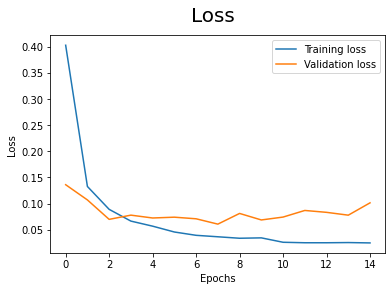

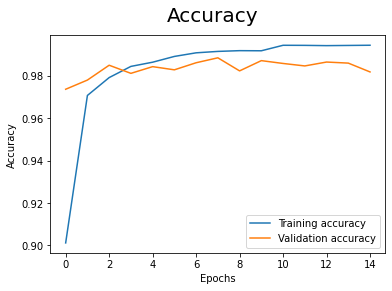

In [ ]:
plt.plot(training_recap2.history['loss'], label = 'Training loss')
plt.plot(training_recap2.history['val_loss'], label = 'Validation loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.suptitle('Loss', fontsize=20)
plt.show()

plt.plot(training_recap2.history['accuracy'], label = 'Training accuracy')
plt.plot(training_recap2.history['val_accuracy'], label = 'Validation accuracy')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.suptitle('Accuracy', fontsize=20)
plt.show()

## Show 100 Random Output Samples

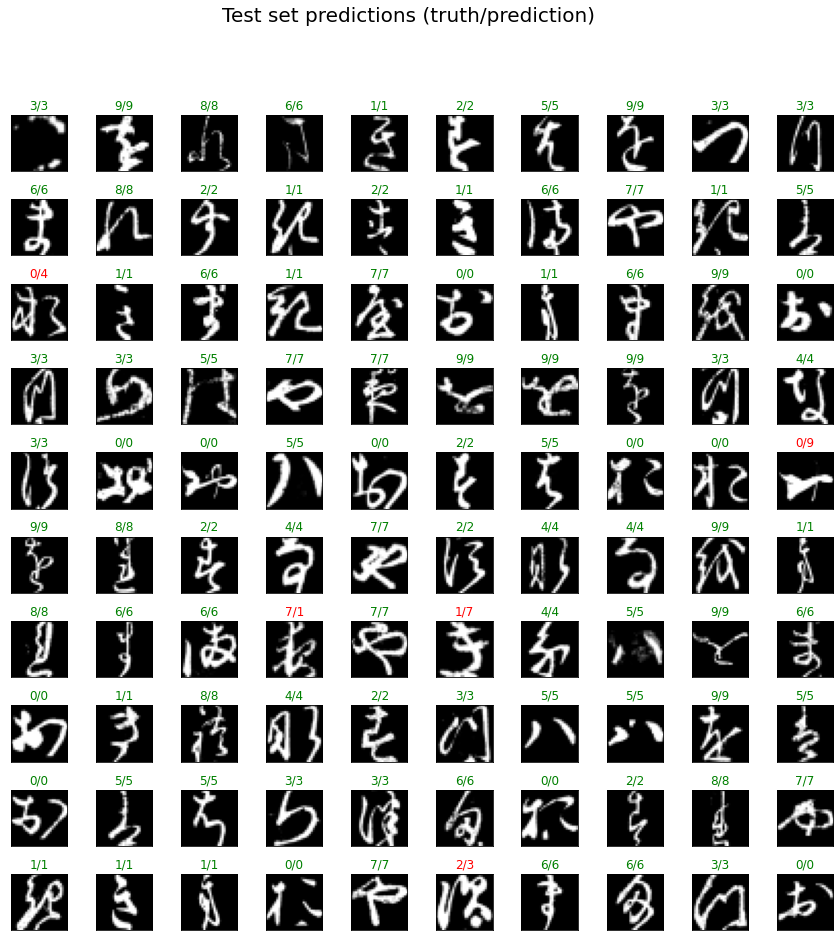

In [ ]:
# Generate 100 random output predictions
random_idx = np.random.randint(0, test_set.shape[0], 100)

random_set = test_set[random_idx]
random_labels = test_labels[random_idx].argmax(axis=1).reshape(10, 10)
pred_labels = model2.predict(random_set).argmax(axis=1).reshape(10, 10)

random_set = random_set.reshape(10, 10, image_dim, image_dim)

# Create 10x10 grid
fig, ax = plt.subplots(10, 10, figsize=(15, 15))
fig.suptitle('Test set predictions (truth/prediction)', fontsize=20)

for i in range(random_set.shape[0]):
    for j in range(random_set.shape[1]):
        example = random_set[i, j]
        ax[i, j].imshow(example, cmap='gray')
        ax[i, j].set_xticks([])
        ax[i, j].set_yticks([])
        color = ('green' if random_labels[i, j] == pred_labels[i, j] else 'red')
        ax[i, j].set_title(f"{random_labels[i, j]}/{pred_labels[i, j]}", color=color)

plt.subplots_adjust(hspace=0.5)
plt.show()

## Evaluate Model 2

In [ ]:
print("Evaluate model on test data...")
results = model2.evaluate(test_set, test_labels, batch_size=batch_size)
print("The test loss is:", results[0])
print("The test accuracy is:", results[1])
print("\n\n")

# Generate a prediction using model.predict() 
# and calculate it's shape:
print("Generate a prediction")
prediction = model2.predict(test_set[:1])
print("prediction shape:", prediction.shape)

Evaluate model on test data
157/157 [==============================] - 1s 4ms/step - loss: 0.2776 - accuracy: 0.9496
Test loss: 0.2776
Test accuracy: 0.9496
Generate a prediction
prediction shape: (1, 10)
